<a href="https://colab.research.google.com/github/philnumpy/PRML-PROJECT/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [45]:
data=pd.read_csv("dataset.csv")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [47]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [48]:
for col in data.columns:
  data.dropna(inplace=True)

In [49]:
data=data.drop_duplicates()

In [50]:
data.info()
song_names=data['track_name']

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [51]:
dataframe=data.iloc[:,8:]
dataframe.drop(['track_genre'],axis=1,inplace=True)
dataframe=dataframe.drop_duplicates()

In [52]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83466 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      83466 non-null  float64
 1   energy            83466 non-null  float64
 2   key               83466 non-null  int64  
 3   loudness          83466 non-null  float64
 4   mode              83466 non-null  int64  
 5   speechiness       83466 non-null  float64
 6   acousticness      83466 non-null  float64
 7   instrumentalness  83466 non-null  float64
 8   liveness          83466 non-null  float64
 9   valence           83466 non-null  float64
 10  tempo             83466 non-null  float64
 11  time_signature    83466 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 8.3 MB


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataframe=sc.fit_transform(dataframe)


In [54]:
pca=PCA(n_components=2)
pca_features=pca.fit_transform(dataframe)

In [63]:
from sklearn.neighbors import NearestNeighbors
k=6
knn=NearestNeighbors(n_neighbors=k,metric='euclidean')
knn.fit(dataframe)


NearestNeighbors(metric='cosine', n_neighbors=6)

In [64]:
song_index=26
distances,indices=knn.kneighbors([dataframe[song_index]])
recommendation=indices[0][1:]
print(f'song name {song_names[song_index]}')
print('Recommended songs:')
for i in recommendation:
  print(song_names[i])

song name Winter Wonderland
Recommended songs:
Fine On The Outside
You and Me on the Rock
Invaders Must Die
我武者羅 (TV size)
The Day Is My Enemy


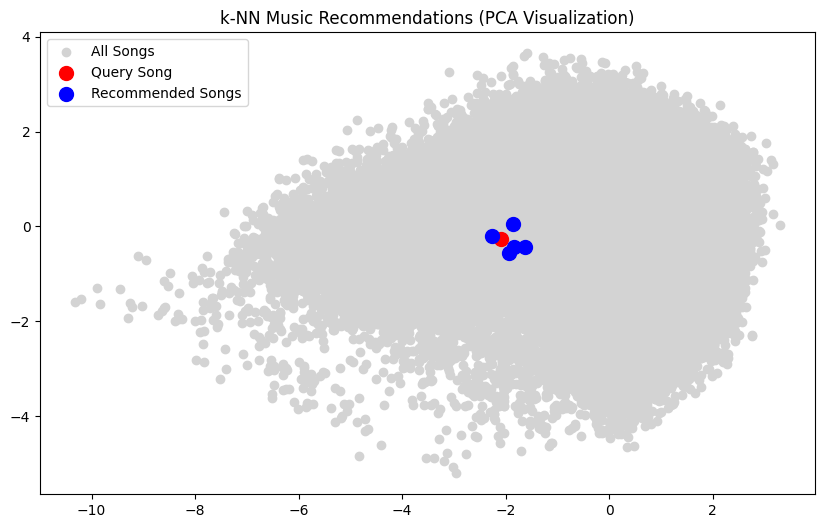

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], color='lightgray', label="All Songs")
plt.scatter(pca_features[song_index, 0], pca_features[song_index, 1], color='red', s=100, label="Query Song")
plt.scatter(pca_features[recommendation, 0], pca_features[recommendation, 1], color='blue', s=100, label="Recommended Songs")
plt.title("k-NN Music Recommendations (PCA Visualization)")
plt.legend()
plt.show()
